In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [3]:
birds_CR = pd.read_csv("../task_data/task3/birds_CR.csv", keep_default_na=False)
birds_CR_grouped = birds_CR.groupby(["index", "full_name"]).agg(
    count=('taxonid', 'count'),
    scientific_names=('scientific_name', lambda x: list(x.unique())),
    common_names=('common_name', lambda x: list(x.unique()))
).reset_index()

In [3]:
metrics_gemini = pd.read_csv("task3/final_task3_v1_gemini_responses.csv", keep_default_na=False)
metrics_gpt = pd.read_csv("task3/final_task3_v1_gpt_responses.csv", keep_default_na=False)

metrics_joined = metrics_gemini.join(metrics_gpt.add_suffix('_gpt'))

/var/folders/pp/c6m9_85s5rd16hbzmflk4b9r0000gn/T/ipykernel_4215/1837920883.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.8)


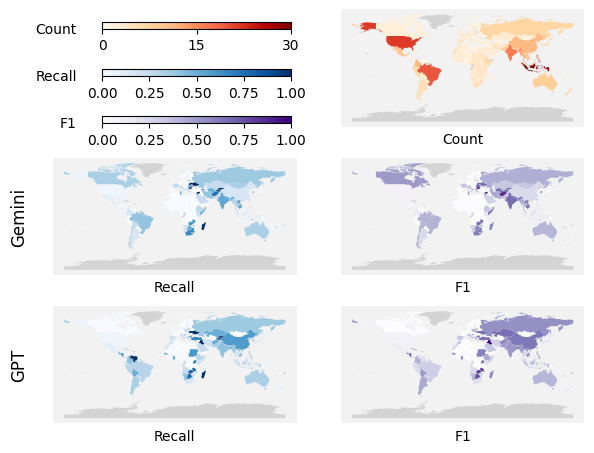

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the world data
world = gpd.read_file("../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# Merge the bird data with the world data on ISO_A2 and the metrics data on 'iso'
world = world.merge(birds_CR_grouped, left_on="ISO_A2_EH", right_on="index", how="left")
world = world.merge(metrics_joined[['iso', 'Recall', 'F1', 'Recall_gpt', 'F1_gpt']], left_on="ISO_A2_EH", right_on="iso", how="left")

world.fillna(0)

# Create a 2x3 grid of subplots
cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(3, 2, figsize=(16*cm, 12*cm))

# Adjust layout for tighter spacing
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# First row, middle only: Plot Count
world.plot(ax=axes[0, 1], column='count', cmap='OrRd', legend=False,
           missing_kwds={"color": "lightgray", "label": "No Data"})
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['left'].set_visible(False)
axes[0, 1].spines['bottom'].set_visible(False)
axes[0, 1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[0, 1].set_facecolor('#F2F2F2')
axes[0, 1].set_xlabel("Count", fontsize=10)

# Hide the first plot in the first row
axes[0, 0].axis('off')

# Second row: Recall and F1 for Gemini
# Add "Gemini" label on the leftmost side
axes[1, 0].annotate('Gemini', xy=(0, 0.5), xytext=(-axes[1, 0].yaxis.labelpad - 10, 0),
                    xycoords=axes[1, 0].yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)

# Recall (Gemini)
world.plot(ax=axes[1, 0], column='Recall', cmap='Blues', missing_kwds={"color": "lightgray", "label": "No Data"})
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['left'].set_visible(False)
axes[1, 0].spines['bottom'].set_visible(False)
axes[1, 0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[1, 0].set_facecolor('#F2F2F2')
axes[1, 0].set_xlabel("Recall", fontsize=10)


# F1 (Gemini)
world.plot(ax=axes[1, 1], column='F1', cmap='Purples', missing_kwds={"color": "lightgray", "label": "No Data"})
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['left'].set_visible(False)
axes[1, 1].spines['bottom'].set_visible(False)
axes[1, 1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[1, 1].set_facecolor('#F2F2F2')
axes[1, 1].set_xlabel("F1", fontsize=10)


# Third row: Recall and F1 for GPT
# Add "GPT" label on the leftmost side
axes[2, 0].annotate('GPT', xy=(0, 0.5), xytext=(-axes[2, 0].yaxis.labelpad - 10, 0),
                    xycoords=axes[2, 0].yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)

# Recall (GPT)
world.plot(ax=axes[2, 0], column='Recall_gpt', cmap='Blues', missing_kwds={"color": "lightgray", "label": "No Data"})
axes[2, 0].spines['top'].set_visible(False)
axes[2, 0].spines['right'].set_visible(False)
axes[2, 0].spines['left'].set_visible(False)
axes[2, 0].spines['bottom'].set_visible(False)
axes[2, 0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[2, 0].set_facecolor('#F2F2F2')
axes[2, 0].set_xlabel("Recall", fontsize=10)


# F1 (GPT)
world.plot(ax=axes[2, 1], column='F1_gpt', cmap='Purples', missing_kwds={"color": "lightgray", "label": "No Data"})
axes[2, 1].spines['top'].set_visible(False)
axes[2, 1].spines['right'].set_visible(False)
axes[2, 1].spines['left'].set_visible(False)
axes[2, 1].spines['bottom'].set_visible(False)
axes[2, 1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[2, 1].set_facecolor('#F2F2F2')
axes[2, 1].set_xlabel("F1", fontsize=10)


# Add horizontal colorbars in the empty top-left corner
cbar_ax = fig.add_axes([0.19, 0.9, 0.3, 0.015])  # Position for the first horizontal colorbar (Count)
sm_count = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=1))
cb_count = fig.colorbar(sm_count, cax=cbar_ax, orientation='horizontal')

# Customize ticks for Count
cb_count.set_ticks([0, 0.5, 1])
cb_count.set_ticklabels([0, 15, 30])
axes[0, 0].text(0.15, 0.9, "Count", va='center', ha='right', fontsize=10, transform=fig.transFigure)

cbar_ax2 = fig.add_axes([0.19, 0.8, 0.3, 0.015])  # Position for the second horizontal colorbar (Recall)
fig.colorbar(plt.cm.ScalarMappable(cmap='Blues'), cax=cbar_ax2, orientation='horizontal')
axes[0, 0].text(0.15, 0.8, "Recall", va='center', ha='right', fontsize=10, transform=fig.transFigure)

cbar_ax3 = fig.add_axes([0.19, 0.7, 0.3, 0.015])  # Position for the third horizontal colorbar (F1)
fig.colorbar(plt.cm.ScalarMappable(cmap='Purples'), cax=cbar_ax3, orientation='horizontal')
axes[0, 0].text(0.15, 0.7, "F1", va='center', ha='right', fontsize=10, transform=fig.transFigure)


# Adjust layout to prevent overlap with legends
plt.tight_layout(pad=0.8)
plt.savefig('plots/task3_map.png', format='png', dpi=1200, bbox_inches='tight')
plt.show()


compute mean recall and such

In [9]:
metrics_joined = metrics_gemini.join(metrics_gpt.add_suffix('_gpt'))

In [10]:
metrics_joined.dropna().describe()

,Precision,Recall,F1,Precision_gpt,Recall_gpt,F1_gpt
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.254565,0.180213,0.191111,0.316282,0.200867,0.221165
std,0.357057,0.282559,0.269439,0.392792,0.281740,0.277353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.320513,0.400000,0.633333,0.333333,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
import json
import ast
import re
import numpy as np
with open('../final_results/task3/final_task3_v1_gemini_responses.json') as f:
    gemini_responses = json.load(f)


In [17]:
gemini_responses.values()

dict_values([{'question': 'List the birds that are classified as Critically Endangered on the IUCN Red List and are found in United Arab Emirates.\n\nInstructions:\n\n- Provide the species names using their common names only.\n- Format your response as a Python list, like this: [Species name 1, Species name 2, ...].\n- Ensure that there are no duplicate species names in your list.', 'response': "```python\n['Socotra Cormorant']\n```\n", 'correct_common_names': ['Yellow-breasted Bunting', 'Sociable Lapwing'], 'correct_scientific_names': ['Emberiza aureola', 'Vanellus gregarius']}, {'question': 'List the birds that are classified as Critically Endangered on the IUCN Red List and are found in Afghanistan.\n\nInstructions:\n\n- Provide the species names using their common names only.\n- Format your response as a Python list, like this: [Species name 1, Species name 2, ...].\n- Ensure that there are no duplicate species names in your list.', 'response': "```python\n['Sociable Lapwing', 'Whi

In [24]:
def parse_string_to_list(s):
    # Try using ast.literal_eval for quoted string lists
    try:
        return ast.literal_eval(s.strip())
    except (ValueError, SyntaxError):
        # Fallback for unquoted lists
        cleaned_string = s.strip().strip("[]")
        return [item.strip() for item in cleaned_string.split(",")]
def normalize(name):
    return re.sub(r'[-\s]', '', name.lower())
lengths = []
# Function to count the number of species in the response list
def count_species_in_response(data):
    # Print each question along with correct answers
        for taxon_id, data in data.items():
            response = data['response']

            try:
                # Step 1: Find the index of the first '[' and the last ']'
                start_index = response.find('[')
                end_index = response.rfind(']') + 1  # +1 to include the closing bracket

                # Step 2: Extract the substring containing just the list
                cleaned_response = response[start_index:end_index]
                cleaned_response_fixed = re.sub(r"(?<=[a-zA-Z])'(?=[a-zA-Z]{1})", "", cleaned_response)

                model_answers = parse_string_to_list(cleaned_response_fixed)

                lengths.append(len(model_answers))



            except (ValueError, SyntaxError):
                continue

        return np.mean(lengths), np.max(lengths)


# Compute average and maximum response lengths
avg_length, max_length = count_species_in_response(gemini_responses)
avg_length, max_length

(2.3897435897435897, 19)